# Exploration et visualisation du dataset

On commence par installer les premiers modules nécessaires et importer les données dans un DataFrame.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('other_data.csv')

In [118]:
df.head(10)

,filename,url,description,type,filepath,scraped,old_filename,old_filepath
0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg
1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg
2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg
3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg
4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg
5,img_0000005.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000005.jpg,1,img_0000005.jpg,./facture/img_0000005.jpg
6,img_0000006.jpg,https://binaries.templates.cdn.office.net/supp...,Facture de service simple,facture,./final/img_0000006.jpg,1,img_0000006.jpg,./facture/img_0000006.jpg
7,img_0000007.jpg,https://binaries.templates.cdn.office.net/supp...,Factures - Office.com,facture,./final/img_0000007.jpg,1,img_0000007.jpg,./facture/img_0000007.jpg
8,img_0000008.jpg,https://mk0independanti6lhsy.kinstacdn.com/wp-...,Modèle Facture | 100% GRATUIT | Format Excel o...,facture,./final/img_0000008.jpg,1,img_0000008.jpg,./facture/img_0000008.jpg
9,img_0000009.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000009.jpg,1,img_0000009.jpg,./facture/img_0000009.jpg


Les informations sont assez claires. On cherche à se rendre compte de la distribution de la variable 'scraped'.

In [3]:
df['scraped'].value_counts()

1    808
0    800
Name: scraped, dtype: int64

Environ la moitié des données ont été "scrapées" directement sur une URL. Cela se confirme en regardant l'info du DF :

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      1608 non-null   object
 1   url           808 non-null    object
 2   description   808 non-null    object
 3   type          1608 non-null   object
 4   filepath      1608 non-null   object
 5   scraped       1608 non-null   int64 
 6   old_filename  808 non-null    object
 7   old_filepath  1608 non-null   object
dtypes: int64(1), object(7)
memory usage: 100.6+ KB


Où l'on voit effectivement que les données "scraped" ont une URL et une description, pas les autres.

## Nettoyage du dataset

Les colonnes old_filename, old_filepath, et filepath n'apportent aucune information. On les supprime.

In [120]:
df = df.drop(['old_filename', 'old_filepath', 'filepath'], axis = 1)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1608 non-null   object
 1   url          808 non-null    object
 2   description  808 non-null    object
 3   type         1608 non-null   object
 4   scraped      1608 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.9+ KB


On va ensuite chercher à se rendre mieux compte de ce que contient la variable "type".

In [122]:
df['type'].value_counts()

rrc.cvc                   300
paye                      239
carte postale             214
id_pieces                 138
passeport                 104
facture                    73
justif_domicile            40
presentation               40
handwritten                40
news_article               36
advertisement              33
budget                     33
invoice                    32
scientific_report          32
questionnaire              31
memo                       31
resume                     30
letter                     29
scientific_publication     28
email                      28
form                       27
specification              26
file_folder                24
Name: type, dtype: int64

On voit que l'on a une vingtaine de types différents dans le dataset. Certains sont en français et d'autres en anglais, ce qui donne une première indication potentielle sur les données.

L'objectif étant d'avoir des documents épars et de savoir les classifier / en extraire les informations, on considère que l'URL et la description ne sont pas pertinentes.

In [123]:
df = df.drop(['url', 'description', 'scraped'], axis = 1)

In [124]:
df.head(20)

,filename,type
0,img_0000000.jpg,facture
1,img_0000001.jpg,facture
2,img_0000002.jpg,facture
3,img_0000003.jpg,facture
4,img_0000004.jpg,facture
5,img_0000005.jpg,facture
6,img_0000006.jpg,facture
7,img_0000007.jpg,facture
8,img_0000008.jpg,facture
9,img_0000009.jpg,facture


Le dataframe a été (largement) épuré afin de ne garder que des informations qu'on saura utiliser. 

## Ajout des caractéristiques des images du dataset

On va maintenant intégrer à ce dataframe les caractéristiques des différentes images, en commençant par leur poids et leur taille respectives.

In [10]:
from PIL import Image

In [11]:
# Test sur la première image.
import os
os.path.getsize('img_0000000.jpg')

59453

In [12]:
# Le test est concluant, donc on généralise à tout le dataset.
size = []
for i in range(df.shape[0]):
    size.append(os.path.getsize(df['filename'][i]))

In [13]:
df['size'] = size

In [14]:
# Et on visualise le résultat.
df.head(10)

,filename,type,size
0,img_0000000.jpg,facture,59453
1,img_0000001.jpg,facture,55157
2,img_0000002.jpg,facture,32097
3,img_0000003.jpg,facture,63937
4,img_0000004.jpg,facture,79474
5,img_0000005.jpg,facture,68646
6,img_0000006.jpg,facture,26462
7,img_0000007.jpg,facture,28599
8,img_0000008.jpg,facture,64957
9,img_0000009.jpg,facture,59191


In [15]:
# On ajoute à présent les dimensions des images.
width = []
height = []
for i in range(df.shape[0]):
    img = Image.open(df['filename'][i])
    width.append(img.width)
    height.append(img.height)

df['width'] = width
df['height'] = height

In [16]:
# Et on visualise à nouveau le résultat.
df.head(10)

,filename,type,size,width,height
0,img_0000000.jpg,facture,59453,750,1061
1,img_0000001.jpg,facture,55157,750,1061
2,img_0000002.jpg,facture,32097,726,1024
3,img_0000003.jpg,facture,63937,750,1061
4,img_0000004.jpg,facture,79474,773,771
5,img_0000005.jpg,facture,68646,750,1061
6,img_0000006.jpg,facture,26462,498,382
7,img_0000007.jpg,facture,28599,462,600
8,img_0000008.jpg,facture,64957,945,1024
9,img_0000009.jpg,facture,59191,750,1061


## Première tentative d'OCR-isation

On choisit PyTesseract pour mener cette première océrisation (OCR-isation ?) du dataset.

In [17]:
import pytesseract
#pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [18]:
# Test
print(pytesseract.image_to_string(Image.open('img_0000000.jpg')))

FACTURE

Joanna Binet

 

 

 

48 Coubertin
31400 Pars
FACTURE A ENVOVE A FACTURE N° FR.001
Cendrilon Ayot Cendrilon Ayot DATE 2e012019
69 rue Nations 46 Rue St Fertéol .
22000 Paris 92360 Ile-de-France COMMANDE N ‘1e90ya0t9
ECHEANCE 24/05/2019
ae DESIGNATION PRIX UNIT. HT MONTANT HT
1 Grand brun escargot pour manger 100.00 100.00
2 Petit mariniére uniforme en bleu 15.00 30.00
3 Facile a jouer accordéon 5.00 15.00
Total HT 145.00
VA 200% 29.00
TOTAL 174.008

CONDITIONS ET MODALITES DE PAIEMENT

Le paiement est d0 dans 15 jours

‘@| Caisse d'Epargne
IBAN: FR12 1234 5678
‘SWIFTIBIC: ABCDFRP1XXX



Le test est très concluant, même si l'image n°0 était de particulièrement bonne qualité. On généralise donc la méthode à tout le dataset.

In [19]:
transcript = []
for i in range(df.shape[0]):
    transcript.append(pytesseract.image_to_string(Image.open(df['filename'][i])))
    
df['transcript'] = transcript

In [20]:
# Et on visualise le résultat.
df.head(10)

,filename,type,size,width,height,transcript
0,img_0000000.jpg,facture,59453,750,1061,FACTURE\n\nJoanna Binet\n\n \n\n \n\n \n\n48 C...
1,img_0000001.jpg,facture,55157,750,1061,Joanna Binet\n\n48 Coubertin\n31400 Paris\nFac...
2,img_0000002.jpg,facture,32097,726,1024,FACTURE\n\nMon entreprise : Nom de la société\...
3,img_0000003.jpg,facture,63937,750,1061,Joanna Binet\n\n48 Coubertin\n\n31400 Paris\n\...
4,img_0000004.jpg,facture,79474,773,771,Payer en ligne »\n\nFACTURE N°\n\nSFIDELI F/05...
5,img_0000005.jpg,facture,68646,750,1061,Joanna Bint\n\n \n\n48 Coubertin\n31400 Paris:...
6,img_0000006.jpg,facture,26462,498,382,[Nom de entreprise] FACTURE\n\nUndress]\n[vile...
7,img_0000007.jpg,facture,28599,462,600,| [VOTRE SOCIETE]\n\n[Choise une dato)\n\nN° D...
8,img_0000008.jpg,facture,64957,945,1024,\n\nIdentification du vendeur\n\nNom : indepe...
9,img_0000009.jpg,facture,59191,750,1061,\n \n \n\nENVOYE A\n\nFACTURE N°\n\n \n\...


In [25]:
#On enregistre au format csv
df.to_csv('data_OCR', sep = '\t', index = False)

## Deuxième tentative d'OCR-isation
On utilise Doctr pour cette deuxième tentative

In [127]:
import os
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
df = pd.read_csv('data_OCR', sep = '\t')
df.head()

,filename,type,size,width,height,transcript
0,img_0000000.jpg,facture,59453,750,1061,FACTURE\n\nJoanna Binet\n\n \n\n \n\n \n\n48 C...
1,img_0000001.jpg,facture,55157,750,1061,Joanna Binet\n\n48 Coubertin\n31400 Paris\nFac...
2,img_0000002.jpg,facture,32097,726,1024,FACTURE\n\nMon entreprise : Nom de la société\...
3,img_0000003.jpg,facture,63937,750,1061,Joanna Binet\n\n48 Coubertin\n\n31400 Paris\n\...
4,img_0000004.jpg,facture,79474,773,771,Payer en ligne »\n\nFACTURE N°\n\nSFIDELI F/05...


In [128]:
doc = DocumentFile.from_images("img_0000596.jpg")

In [129]:
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)


In [130]:
result = model(doc)

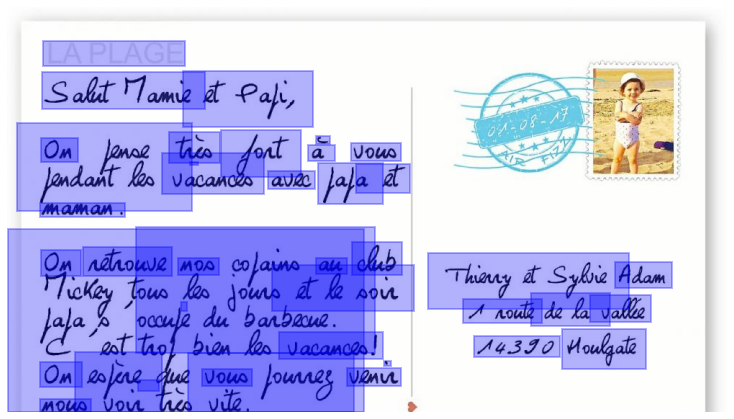

In [131]:
result.show(doc)

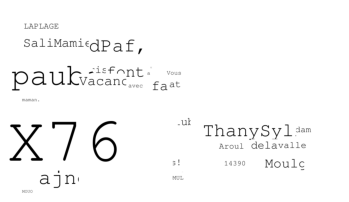

In [132]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [133]:
json_output = result.export()
json_output

{'pages': [{'page_idx': 0,
   'dimensions': (562, 1000),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((0.0498046875, 0.0830078125),
      (0.2470703125, 0.1435546875)),
     'lines': [{'geometry': ((0.0498046875, 0.0830078125),
        (0.2470703125, 0.1435546875)),
       'words': [{'value': 'LAPLAGE',
         'confidence': 0.9994837045669556,
         'geometry': ((0.0498046875, 0.0830078125),
          (0.2470703125, 0.1435546875))}]}],
     'artefacts': []},
    {'geometry': ((0.0478515625, 0.1572265625), (0.4248046875, 0.2958984375)),
     'lines': [{'geometry': ((0.0478515625, 0.1572265625),
        (0.4248046875, 0.2958984375)),
       'words': [{'value': 'SaliMamie',
         'confidence': 0.0869172215461731,
         'geometry': ((0.0478515625, 0.1591796875),
          (0.2744140625, 0.251953125))},
        {'value': 'dPaf,',
         'confidence': 0.04229598864912987,
         'geometry

In [139]:
def to_string(json):
    transcript2 ="" 
    for i in range(len(json_output['pages'])):
        for j in range(len(json_output['pages'][i]['blocks'])):
            for k in range(len(json_output['pages'][i]['blocks'][j]['lines'])):
                for l in range(len(json_output['pages'][i]['blocks'][j]['lines'][k]['words'])):
                    transcript2 += json_output['pages'][i]['blocks'][j]['lines'][k]['words'][l]['value']+" "
    return transcript2

to_string(json_output)
                    

'LAPLAGE SaliMamie dPaf, On tris - font a U Vous pauba Vacancco avec fafa at maman. On nerowe MOA au club Adam - tkou ThanySylie Aroul dela vallee EF Vacances! 14390 - URMUL Moulgate On - Vous vewsoung X76 MOUO ajne '

In [140]:
model = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

transcript = []
for i in range(df.shape[0]):
    doc = DocumentFile.from_images(df['filename'][i])
    result = model(doc)
    json_output = result.export()
    transcript.append(to_string(json_output))
    
df['transcript_Doctr'] = transcript
    

In [141]:
df.head()

,filename,type,size,width,height,transcript,transcript_Doctr
0,img_0000000.jpg,facture,59453,750,1061,FACTURE\n\nJoanna Binet\n\n \n\n \n\n \n\n48 C...,FACTURE LOGO Joanna Binet 48 Coubertin 31400 P...
1,img_0000001.jpg,facture,55157,750,1061,Joanna Binet\n\n48 Coubertin\n31400 Paris\nFac...,Joanna Binet 48 Coubertin 31400 Paris FACTURE ...
2,img_0000002.jpg,facture,32097,726,1024,FACTURE\n\nMon entreprise : Nom de la société\...,FACTURE Mon entreprise : Nom de la société Adr...
3,img_0000003.jpg,facture,63937,750,1061,Joanna Binet\n\n48 Coubertin\n\n31400 Paris\n\...,Joanna Binet 48 Coubertin 31400 Paris FACTURE ...
4,img_0000004.jpg,facture,79474,773,771,Payer en ligne »\n\nFACTURE N°\n\nSFIDELI F/05...,Payer en ligne > FACTURE No SFIDELI F/05.2020/...


In [142]:
df.to_csv('data_OCR', sep = '\t', index = False)